##Occupancy refers to road occupancy

In [ ]:
# importing libraries
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
class dataproc:

  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    return df

  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter

  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')
    # return df['occupancy'].plot.hist(): histogram plot of occupancy
    # df.plot(x='datetime',y='occupancy'): line plot

  # splitting data by day and hour
  def split_data(self,df):
    df['day'] = df['datetime'].dt.day # extract the day
    df['hour']= df['datetime'].dt.hour  # extract the hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]  # only look at data between 6am and 8pm
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]  # returnig 2 data sets: september 2 and september 3


In [ ]:
path = '/content/gdrive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 02 (explor data analysis)/DATA/delay_bottleneck.csv'
dp = dataproc(path)

In [ ]:
# df = dp.pick_random()

In [ ]:
df = dp.read_csv_format()

In [ ]:
df.head(10)

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
0,MI064E009.1D,64,East,9.1,2017-09-01 02:09:00,62.000000,1.000000,1.000000,0.0,-90.7043,38.7141
1,MI064E009.1D,64,East,9.6,2017-09-01 02:09:00,61.285714,1.476190,1.238095,0.0,-90.7043,38.7141
2,MI064E009.1D,64,East,10.1,2017-09-01 02:09:00,61.214286,1.523810,1.261905,0.0,-90.7043,38.7141
3,MI064E009.1D,64,East,9.1,2017-09-01 02:44:00,59.250000,1.250000,1.000000,0.0,-90.7043,38.7141
4,MI064E009.1D,64,East,9.6,2017-09-01 02:44:00,63.833333,1.071429,1.000000,0.0,-90.7043,38.7141
5,MI064E009.1D,64,East,10.1,2017-09-01 02:44:00,64.700000,1.000000,1.000000,0.0,-90.7043,38.7141
6,MI064E009.1D,64,East,9.1,2017-09-01 02:49:00,57.000000,1.000000,1.000000,0.0,-90.7043,38.7141
7,MI064E009.1D,64,East,9.6,2017-09-01 02:49:00,62.714286,1.000000,1.000000,0.0,-90.7043,38.7141
8,MI064E009.1D,64,East,10.1,2017-09-01 02:49:00,63.500000,1.000000,1.107143,0.0,-90.7043,38.7141
9,MI064E009.1D,64,East,10.6,2017-09-01 02:49:00,61.000000,1.000000,1.285714,0.0,-90.7043,38.7141


(<Axes: ylabel='Frequency'>, <Axes: xlabel='datetime'>)

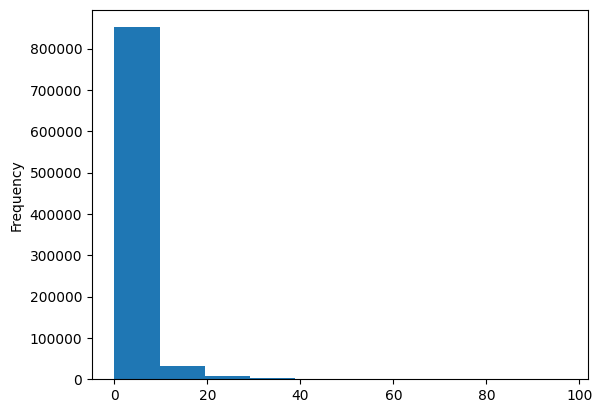

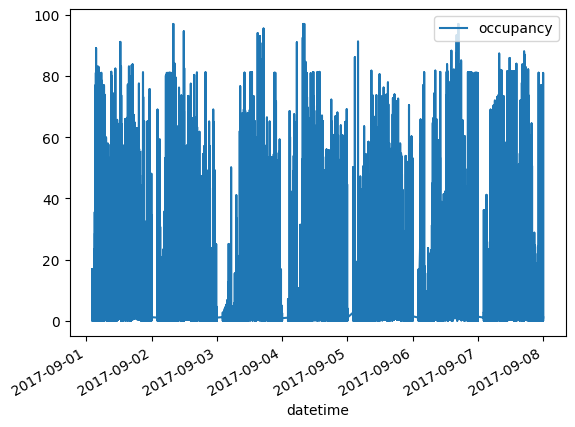

In [ ]:
dp.visualize(df)

##Stationarity

In [ ]:
# df1 is september 2 and df2 is september 3
[df1,df2] = dp.split_data(df)

In [ ]:
# september 2
df1.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
793290,MI270S013.6D,270,South,13.7,2017-09-02 06:09:00,53.464815,1.633333,1.009259,0.0,-90.448502,38.655602,2,6
793291,MI270S013.6D,270,South,14.2,2017-09-02 06:09:00,56.788889,1.800000,1.055556,0.0,-90.448502,38.655602,2,6
793292,MI270S013.6D,270,South,14.7,2017-09-02 06:09:00,60.112963,1.966667,1.101852,0.0,-90.448502,38.655602,2,6
793293,MI270S013.6D,270,South,14.1,2017-09-02 06:44:00,52.875000,2.614583,1.614583,0.0,-90.448502,38.655602,2,6
793294,MI270S013.6D,270,South,14.6,2017-09-02 06:44:00,58.250000,3.104167,2.104167,0.0,-90.448502,38.655602,2,6


In [ ]:
# september 3
df2.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
794063,MI270S013.6D,270,South,11.6,2017-09-03 06:09:00,56.097015,1.0,1.0,0.0,-90.448502,38.655602,3,6
794064,MI270S013.6D,270,South,12.1,2017-09-03 06:09:00,55.723881,1.0,1.0,0.0,-90.448502,38.655602,3,6
794065,MI270S013.6D,270,South,12.6,2017-09-03 06:09:00,54.083333,1.0,1.0,0.0,-90.448502,38.655602,3,6
794066,MI270S013.6D,270,South,13.1,2017-09-03 06:09:00,50.541667,1.0,1.0,0.0,-90.448502,38.655602,3,6
794067,MI270S013.6D,270,South,12.6,2017-09-03 06:44:00,56.166667,1.6,1.0,0.0,-90.448502,38.655602,3,6


<Axes: ylabel='Frequency'>

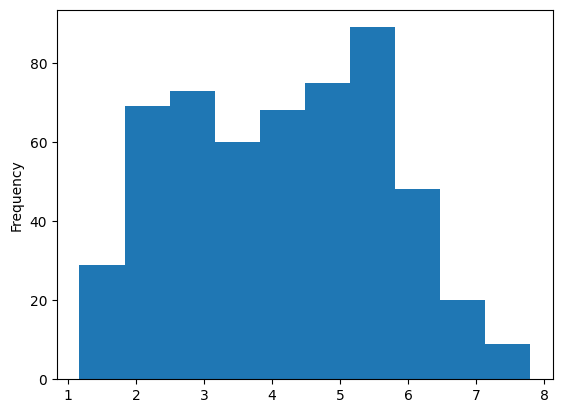

In [ ]:
# occupancy for september 2
df1['volume'].plot.hist()

<Axes: ylabel='Frequency'>

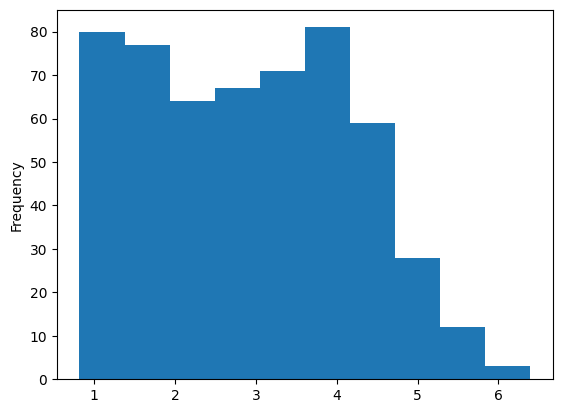

In [ ]:
# occupancy for september 3
df2['volume'].plot.hist()

In [ ]:
print ('means of both datasets')
print (df1['occupancy'].mean(),df2['occupancy'].mean())
print ('\nvariance between both datasets')
print (df1['occupancy'].var(),df2['occupancy'].var())

means of both datasets
2.335489406855142 1.7195002431626014

variance between both datasets
1.4512900245856768 0.6813053459959212


##Use Dicker fuller test to test for significance

---



In [ ]:
# correlation coeffictient: how similar two data sets are
def cor_coeff(df1, df2,column): # inputs are two data frames and column name you want to calculate for

  mu1,std1 = df1[column].values.mean(), df1[column].values.std()
  mu2, std2 = df2[column].values.mean(), df2[column].values.std()

  xcor,ycor = (df1[column]-mu1).values, (df2[column]-mu2).values
  if not (len(xcor) == len(ycor)):  # if data sets not same length, resize
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff


In [ ]:
coeff = cor_coeff(df1, df2, 'volume')
print (coeff)

NameError: name 'df1' is not defined

In [ ]:
# same way to do large code above (calculate correlation coefficient)
# print(np.corrcoef(xcor,ycor))

In [ ]:
# correlation coeffictient: how similar two data sets are
def cor_coeff_array(x, y):
  mu1,std1 = np.mean(x), np.std(x)
  mu2, std2 = np.mean(y), np.std(y)

  xcor,ycor = x-mu1, y-mu2
  if not (len(xcor) == len(ycor)):  # if data sets not same length, resize
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [ ]:
# x_data = volume[0:105]
# y_data = volume[5:107]
# print (cor_coeff_array(x_data, y_data))

In [ ]:
window = 2 # number of data windows
lag = 1 # distance moving the data window
data_len = 300 # check 300 lines of the data file
volume = df1['volume'].values
corrs = []
for data_range in range(0,len(volume)-(data_len+lag),window): # one data window is stationary, the other moves through the data
  x_data = volume[0:data_range+data_len]
  y_data = volume[data_range+lag:data_range+data_len+lag]
  corrs.append(cor_coeff_array(x_data, y_data))

NameError: name 'df1' is not defined

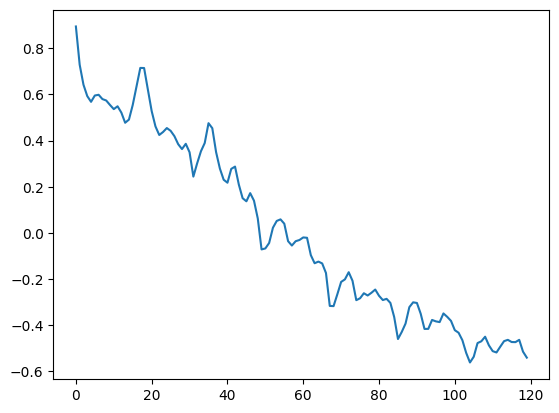

In [ ]:
# correlation gets worse as data windows move futher apart (y is correlation, x is lag between windows)
plt.plot(corrs)

## Note! you can stationarize and non-stationary data

In [ ]:
# write a function for calculating the 5-point, moving/median average of the traffic volume column

In [ ]:
start = 0
step = 1
data_len = 5
y_axis = []
x_axis = []
volume = df1['volume'].values
for data in range(start, len(volume)-data_len, step):
  volume_data = volume[data:data+data_len]
  y_data = np.mean(volume_data)
  y_axis.append(y_data)
  step = step + 1
  x_data = step
  x_axis.append(x_data)

NameError: name 'df1' is not defined

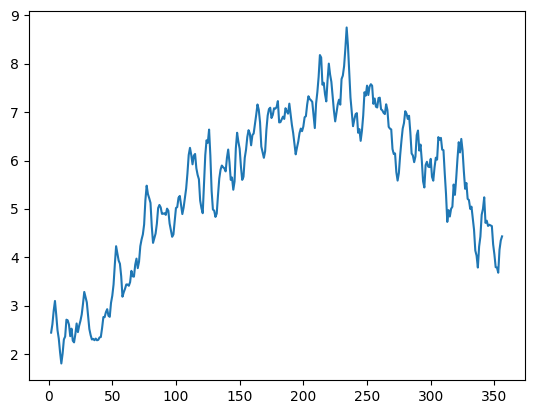

In [ ]:
plt.plot(x_axis, y_axis)

# In class assignment 1/23/2024
## Assign values to discrete series and calculate zscore for continuous series

In [ ]:
df = dp.read_csv_format()

def create_value(df, series, new_series_name):

  df_grp = df.groupby(series).size().reset_index(name = 'cnt')
  df_grp['indx'] = df_grp.index
  df_dict = df_grp.to_dict()[series]
  df_dict = {value:key for key, value in df_dict.items()}  # flip the keys and values for df_dict
  df[new_series_name] = df[series].apply(df_dict.get)

detector_id_value = create_value(df, 'detector_id', 'detector_value')
travelway_value = create_value(df, 'travelway', 'travelway_value')



def get_zscore(df, series, new_series_name):

  mu = series.mean()
  stnd = series.std()
  z_score = series.apply(lambda x: ((x-mu)/stnd))
  df[new_series_name] = z_score

speed_zscore = get_zscore(df, df['speed'], 'speed_zscore')
volume_zscore = get_zscore(df, df['volume'], 'volume_zscore')
occupancy_zscore = get_zscore(df, df['occupancy'], 'occupancy_zscore')
congested_zscore = get_zscore(df, df['congested'], 'congested_zscore')


In [143]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,detector_value,travelway_value,speed_zscore,volume_zscore,occupancy_zscore,congested_zscore
0,MI064E009.1D,64,East,9.1,2017-09-01 02:09:00,62.000000,1.000000,1.000000,0.0,-90.7043,38.7141,0,0,-0.115929,-0.104819,-0.479494,-0.209742
1,MI064E009.1D,64,East,9.6,2017-09-01 02:09:00,61.285714,1.476190,1.238095,0.0,-90.7043,38.7141,0,0,-0.189084,-0.104090,-0.428966,-0.209742
2,MI064E009.1D,64,East,10.1,2017-09-01 02:09:00,61.214286,1.523810,1.261905,0.0,-90.7043,38.7141,0,0,-0.196399,-0.104017,-0.423913,-0.209742
3,MI064E009.1D,64,East,9.1,2017-09-01 02:44:00,59.250000,1.250000,1.000000,0.0,-90.7043,38.7141,0,0,-0.397575,-0.104436,-0.479494,-0.209742
4,MI064E009.1D,64,East,9.6,2017-09-01 02:44:00,63.833333,1.071429,1.000000,0.0,-90.7043,38.7141,0,0,0.071835,-0.104710,-0.479494,-0.209742
